In [45]:
from scipy.io import arff
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.base import clone
from itertools import combinations

import sys
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

MAX_FL = sys.float_info.max

# just to see if the dataset is correct... do not delete
data, meta = arff.loadarff('pollen/pollen_529.arff')
df = pd.DataFrame(data)
print(df)
print(meta)

# Load the pollen-529 dataset into a numpy array
data, meta = arff.loadarff('pollen/pollen_529.arff')
X = np.array([list(row)[:-2] for row in data])
y = np.array([int(row[-2]) for row in data])

# Print the shape of X and y variables
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)
print(X)
print(y)

model = LinearRegression()


        RIDGE     NUB    CRACK   WEIGHT  DENSITY  OBSERVATION_NUMBER
0     -2.3482  3.6314   5.0289  10.8721  -1.3852                 1.0
1     -1.1520  1.4805   3.2375  -0.5939   2.1235                 2.0
2     -2.5245 -6.8633  -2.8037   8.4631  -3.4126                 3.0
3      5.7523 -6.5091  -5.1510   4.3480 -10.3261                 4.0
4      8.7494 -3.8978  -1.3834 -14.8776  -2.4153                 5.0
...       ...     ...      ...      ...      ...                 ...
3843 -11.1764 -3.1833  -0.1941   6.8507   8.5044              3844.0
3844   4.8725 -1.5653  -1.3540 -13.8886   2.1865              3845.0
3845   6.3814  4.3648 -22.4229 -19.1334   1.8819              3846.0
3846   2.7014 -3.8759  -7.2627  -6.2986  -0.4284              3847.0
3847   6.6282 -0.7684 -10.6313  -5.9356  -3.4739              3848.0

[3848 rows x 6 columns]
Dataset: pollen
	RIDGE's type is numeric
	NUB's type is numeric
	CRACK's type is numeric
	WEIGHT's type is numeric
	DENSITY's type is numeric
	OBSE

Preliminary data analysis:

In [46]:
print(f"Dataset shape: {X.shape}")

n_samples, n_features = X.shape
print(f"Number of samples: {n_samples}")
print(f"Number of features: {n_features}")

for i in range(X.shape[1]):
    print(f"Feature {i} of X - range: {np.min(X[i])} to {np.max(X[i])}")

print(f"y range: {np.min(y)} to {np.max(y)}")

print(f"Scale of the dataset: {np.mean(X)}")

print(f"Variance of the dataset: {np.var(X)}")

Dataset shape: (3848, 4)
Number of samples: 3848
Number of features: 4
Feature 0 of X - range: -2.3482 to 10.8721
Feature 1 of X - range: -1.152 to 3.2375
Feature 2 of X - range: -6.8633 to 8.4631
Feature 3 of X - range: -6.5091 to 5.7523
y range: -12 to 10
Scale of the dataset: 0.0009657939189189317
Variance of the dataset: 57.66444351581474


Evaluating the accuracy of different train-test ratios:

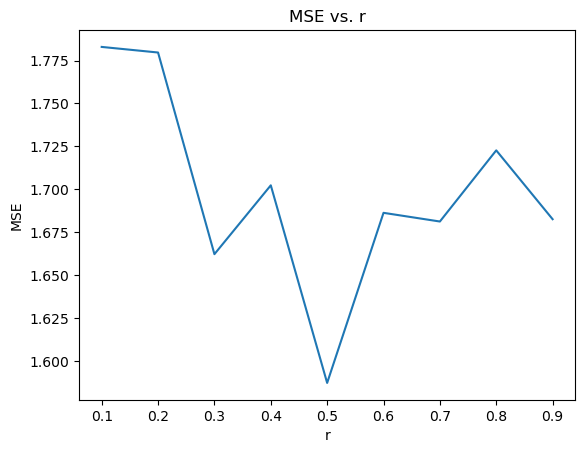

In [47]:
ratios = np.arange(start=0.1, stop=1, step=0.1)
mses = []

for ratio in ratios:
    # split data into tarin and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ratio)
    
    # clone and train
    cloned_model = clone(model)
    cloned_model.fit(X_train, y_train)
    
    mse = mean_squared_error(y_test, cloned_model.predict(X_test))
    mses.append(mse)

# plot the accuracy of each r using pyplot
plt.plot(ratios, mses)

# set the labels for the x and y axes and the title of the plot
plt.xlabel('r')
plt.ylabel('MSE')
plt.title('MSE vs. r')

# display the plot
plt.show()


Naive k-features selection algorithm

In [48]:
def k_features_selection(X_train, X_test, y_train, y_test, k):

    # get all possible combinations of k features
    feature_combinations = combinations(range(X_train.shape[1]), k)
    
    best_mae = MAX_FL
    best_features = None
    
    for features in feature_combinations:
        
        # clone and train a linear regressor using the current feature set
        cloned_model = clone(model)
        cloned_model.fit(X_train[:, list(features)], y_train)
        
        # make predictions on the test set and calculate the accuracy
        y_pred = cloned_model.predict(X_test[:, list(features)])
        mae = mean_absolute_error(y_test, y_pred)
        
        # update the best feature set and accuracy if the current feature set performs better
        if mae < best_mse:
            best_mae = mae
            best_features = features
    
    return best_features, best_mae

# split data into tarin and test
X_train, X_test, y_train, y_test = train_test_split(X, y)

print("K = 2:")
best_features, best_mae = k_features_selection(X_train, X_test, y_train, y_test, 2)
print("Best features: ", best_features)
print("MAE: ", best_mae)

print("K = 3:")
best_features, best_mae = k_features_selection(X_train, X_test, y_train, y_test, 3)
print("Best features: ", best_features)
print("MAE: ", best_mae)

K = 2:
Best features:  (2, 3)
MAE:  1.968673877036756
K = 3:
Best features:  (1, 2, 3)
MAE:  1.7822065430482263
